# Experiment 1 - Results


In [1]:
!pip install matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Mount to Google Drive to save results
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MSc/2020-21/Research\ Project/Colab/
%ls

Mounted at /content/drive
/content/drive/MyDrive/MSc/2020-21/Research Project/Colab
 bharadwaj.csv                              risdal_1250.parquet
 domain_count_df.csv                        risdal_1250.parquet.yml
 experiment_1_res_times_only.csv            risdal_2500.parquet
 experiment_1_res_times_stage_1_only.xlsx   risdal_2500.parquet.yml
 experiment_1_res_times_stage_2_only.csv    risdal_5000.parquet
'fake_news_eda.ipynb - Colaboratory.pdf'    risdal_5000.parquet.yml
 label_count_df.csv                         risdal_7500.parquet
 reuse_content_df.csv                       risdal_7500.parquet.yml
 reuse_content_domain_df.csv                risdal.csv
 reuse_content_url_df.csv                   risdal.parquet
 risdal_10000.parquet                       risdal.parquet.yml
 risdal_10000.parquet_10000.yml             template.yml


In [3]:
# Connect to GCP Bucket
from google.colab import auth
auth.authenticate_user()

In [4]:
# Set GCP project ID and region to Europe West 2 - London
PROJECT = 'fake-news-bs-detector'
!gcloud config set project $PROJECT
REGION = 'europe-west2'
CLUSTER = '{}-cluster'.format(PROJECT)
!gcloud config set compute/region $REGION
!gcloud config list # show some information

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey

Updated property [compute/region].
Updated property [dataproc/region].
[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
region = europe-west2
[core]
account = aaron.altrock@gmail.com
project = fake-news-bs-detector
[dataproc]
region = europe-west2

Your active configuration is: [default]


## Read in the results in CSV files

In [67]:
# Read in from the Google Drive at mount point
stage_1_res_file_nm = 'experiment_1_res_times_stage_1_only.csv'
stage_1_res_df = pd.read_csv(stage_1_res_file_nm)
print('Stage 1: Dimension of {}: {} x {}'.format(stage_1_res_file_nm, stage_1_res_df.shape[0], stage_1_res_df.shape[1]))

stage_2_res_file_nm = 'experiment_1_res_times_stage_2_only.csv'
stage_2_res_df = pd.read_csv(stage_2_res_file_nm)
print('Stage 2: Dimension of {}: {} x {}'.format(stage_2_res_file_nm, stage_2_res_df.shape[0], stage_2_res_df.shape[1]))

Stage 1: Dimension of experiment_1_res_times_stage_1_only.csv: 25 x 6
Stage 2: Dimension of experiment_1_res_times_stage_2_only.csv: 25 x 6


In [68]:
# Stage 1 
stage_1_res_df

,Size,Stage,1a,1b,1c,1d
0,1250,Stage 1,45.64,108.75,324,475
1,1250,Stage 1,34.59,111.45,352,456
2,1250,Stage 1,35.49,107.28,356,458
3,1250,Stage 1,40.17,114.64,352,460
4,1250,Stage 1,36.37,109.30,357,491
5,2500,Stage 1,54.78,179.32,410,461
6,2500,Stage 1,54.74,180.87,366,460
7,2500,Stage 1,56.80,177.27,324,476
8,2500,Stage 1,55.48,184.47,370,441
9,2500,Stage 1,56.78,184.47,338,469


In [69]:
# Stage 2
stage_2_res_df

,Size,Stage,1a,1b,1c,1d
0,1250,Stage 2,819.29,1015.82,545,991
1,1250,Stage 2,824.67,1148.38,550,1051
2,1250,Stage 2,828.73,911.12,500,990
3,1250,Stage 2,817.50,883.08,511,1053
4,1250,Stage 2,863.63,893.00,541,996
5,2500,Stage 2,1081.60,1710.55,666,1545
6,2500,Stage 2,1102.60,1698.07,672,1347
7,2500,Stage 2,1117.81,1733.36,645,1312
8,2500,Stage 2,1145.76,1692.81,630,2217
9,2500,Stage 2,1144.45,1723.29,656,1475


In [70]:
# Melt the two data frames into tidy forms for Stage 1 and 2 results
stage_1_res_melted_df = pd.melt(stage_1_res_df, id_vars=['Size', 'Stage'])
stage_2_res_melted_df = pd.melt(stage_2_res_df, id_vars=['Size', 'Stage'])

# Calculate Median points
stage_1_res_q50_df = stage_1_res_melted_df.groupby(['Size', 'Stage', 'variable']).quantile(q=.5).reset_index().sort_values(by=['Stage', 'Size', 'variable'])
stage_2_res_q50_df = stage_2_res_melted_df.groupby(['Size', 'Stage', 'variable']).quantile(q=.5).reset_index().sort_values(by=['Stage', 'Size', 'variable'])

In [71]:
stage_1_res_q50_df

,Size,Stage,variable,value
0,1250,Stage 1,1a,36.37
1,1250,Stage 1,1b,109.30
2,1250,Stage 1,1c,352.00
3,1250,Stage 1,1d,460.00
4,2500,Stage 1,1a,55.48
5,2500,Stage 1,1b,180.87
6,2500,Stage 1,1c,366.00
7,2500,Stage 1,1d,461.00
8,5000,Stage 1,1a,93.74
9,5000,Stage 1,1b,316.33


In [72]:
stage_2_res_q50_df

,Size,Stage,variable,value
0,1250,Stage 2,1a,824.67
1,1250,Stage 2,1b,911.12
2,1250,Stage 2,1c,541.00
3,1250,Stage 2,1d,996.00
4,2500,Stage 2,1a,1117.81
5,2500,Stage 2,1b,1710.55
6,2500,Stage 2,1c,656.00
7,2500,Stage 2,1d,1475.00
8,5000,Stage 2,1a,2361.90
9,5000,Stage 2,1b,3376.45


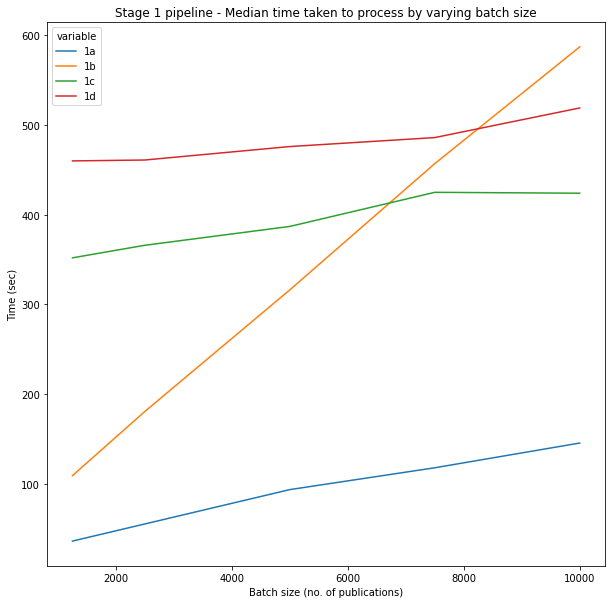

In [73]:
# Plot Stage 1 time taken by batch size with 95% confidence intervals around the mean
p = sns.lineplot(data=stage_1_res_q50_df, x='Size', y='value', hue='variable', markers=True)
p.set_title('Stage 1 pipeline - Median time taken to process by varying batch size')
p.set_ylabel('Time (sec)')
p.set_xlabel('Batch size (no. of publications)')
fig_size = plt.rcParams['figure.figsize'] = [10, 10]

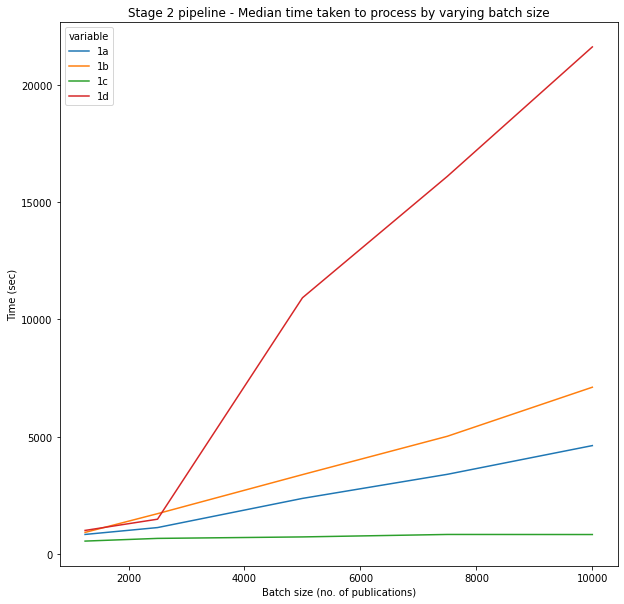

In [74]:
# Plot Stage 2 time taken by batch size with 95% confidence intervals around the mean
p = sns.lineplot(data=stage_2_res_q50_df, x='Size', y='value', hue='variable', markers=True)
p.set_title('Stage 2 pipeline - Median time taken to process by varying batch size')
p.set_ylabel('Time (sec)')
p.set_xlabel('Batch size (no. of publications)')
fig_size = plt.rcParams['figure.figsize'] = [10, 10]

In [75]:
# Calculate other descriptive statistics

stage_1_res_mean_df = stage_1_res_melted_df.groupby(['Size', 'Stage', 'variable']).mean().reset_index().sort_values(by=['Stage', 'Size', 'variable'])
stage_2_res_mean_df = stage_2_res_melted_df.groupby(['Size', 'Stage', 'variable']).mean().reset_index().sort_values(by=['Stage', 'Size', 'variable'])

In [76]:
stage_1_res_mean_df

,Size,Stage,variable,value
0,1250,Stage 1,1a,38.452
1,1250,Stage 1,1b,110.284
2,1250,Stage 1,1c,348.200
3,1250,Stage 1,1d,468.000
4,2500,Stage 1,1a,55.716
5,2500,Stage 1,1b,181.280
6,2500,Stage 1,1c,361.600
7,2500,Stage 1,1d,461.400
8,5000,Stage 1,1a,91.390
9,5000,Stage 1,1b,317.266


In [77]:
stage_2_res_mean_df

,Size,Stage,variable,value
0,1250,Stage 2,1a,830.764
1,1250,Stage 2,1b,970.280
2,1250,Stage 2,1c,529.400
3,1250,Stage 2,1d,1016.200
4,2500,Stage 2,1a,1118.444
5,2500,Stage 2,1b,1711.616
6,2500,Stage 2,1c,653.800
7,2500,Stage 2,1d,1579.200
8,5000,Stage 2,1a,2342.764
9,5000,Stage 2,1b,3356.332


In [78]:
stage_1_res_sd_df = stage_1_res_melted_df.groupby(['Size', 'Stage', 'variable']).std().reset_index().sort_values(by=['Stage', 'Size', 'variable'])
stage_2_res_sd_df = stage_2_res_melted_df.groupby(['Size', 'Stage', 'variable']).std().reset_index().sort_values(by=['Stage', 'Size', 'variable'])

In [79]:
stage_1_res_sd_df

,Size,Stage,variable,value
0,1250,Stage 1,1a,4.545384
1,1250,Stage 1,1b,2.858309
2,1250,Stage 1,1c,13.718601
3,1250,Stage 1,1d,14.882876
4,2500,Stage 1,1a,1.023660
5,2500,Stage 1,1b,3.179701
6,2500,Stage 1,1c,33.178306
7,2500,Stage 1,1d,13.126309
8,5000,Stage 1,1a,4.675869
9,5000,Stage 1,1b,1.532752


In [80]:
stage_2_res_sd_df

,Size,Stage,variable,value
0,1250,Stage 2,1a,18.901285
1,1250,Stage 2,1b,112.771279
2,1250,Stage 2,1c,22.389730
3,1250,Stage 2,1d,32.767362
4,2500,Stage 2,1a,27.529032
5,2500,Stage 2,1b,16.936498
6,2500,Stage 2,1c,16.798809
7,2500,Stage 2,1d,368.825433
8,5000,Stage 2,1a,67.814839
9,5000,Stage 2,1b,46.263703


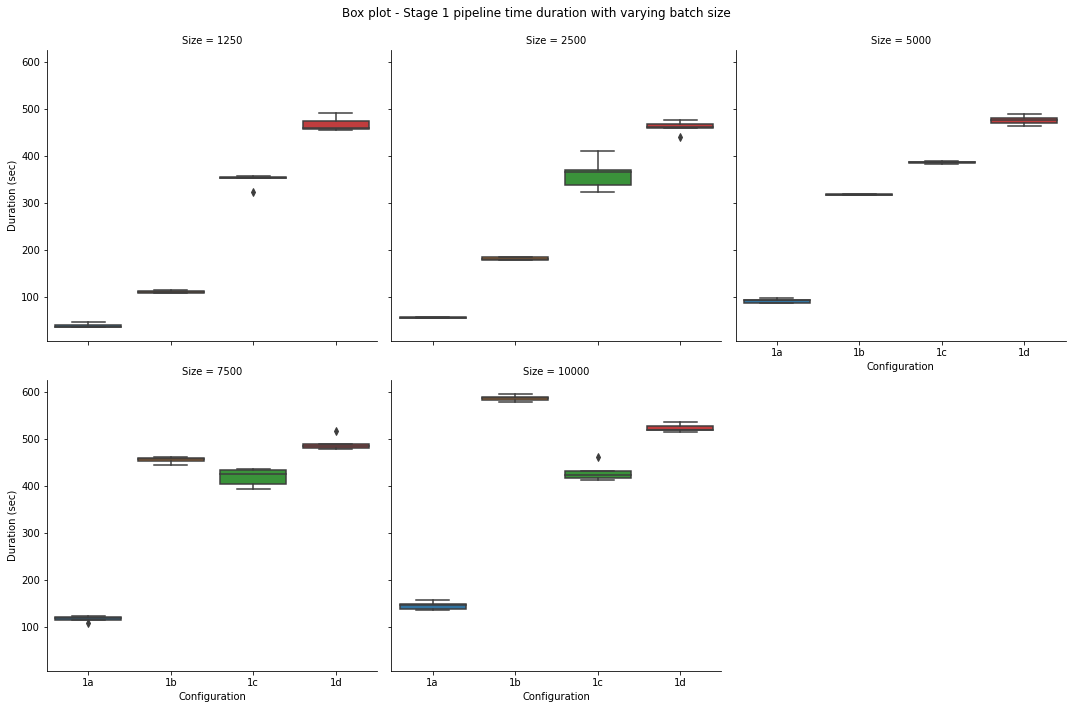

In [102]:
p = sns.catplot(data=stage_1_res_melted_df, x='variable', y='value', kind='box', col='Size', col_wrap=3)\
  .set(xlabel='Configuration', ylabel='Duration (sec)')\

p.fig.suptitle('Box plot - Stage 1 pipeline time duration with varying batch size')
p.fig.subplots_adjust(top=.92)

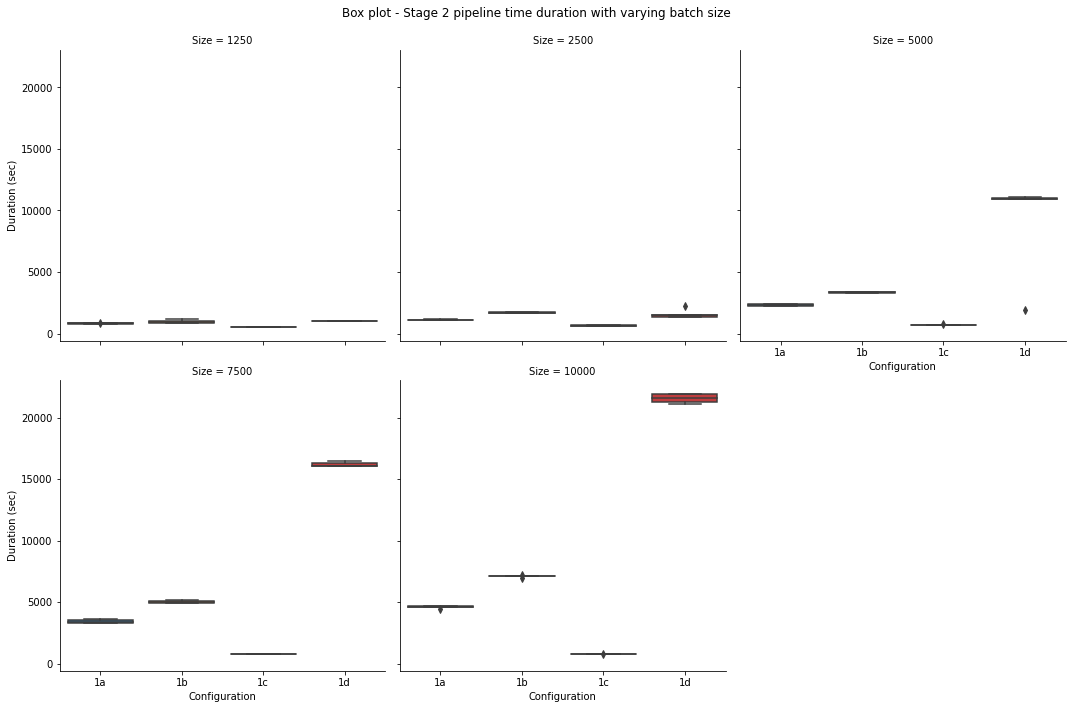

In [104]:
p = sns.catplot(data=stage_2_res_melted_df, x='variable', y='value', kind='box', col='Size', col_wrap=3)\
  .set(xlabel='Configuration', ylabel='Duration (sec)')\

p.fig.suptitle('Box plot - Stage 2 pipeline time duration with varying batch size')
p.fig.subplots_adjust(top=.92)

In [116]:
# Combine median and sd and save to file
stage_1_combi_res_df = pd.concat([stage_1_res_q50_df, stage_1_res_sd_df[['value']]], axis=1)
stage_1_combi_res_df.columns = ['Batch Size', 'Stage', 'Config', 'Duration - Median', 'Duration - Standard Deviation']
stage_1_combi_res_df.to_csv('stage_1_combi_res_df.csv', index=0)
stage_1_combi_res_df

,Batch Size,Stage,Config,Duration - Median,Duration - Standard Deviation
0,1250,Stage 1,1a,36.37,4.545384
1,1250,Stage 1,1b,109.30,2.858309
2,1250,Stage 1,1c,352.00,13.718601
3,1250,Stage 1,1d,460.00,14.882876
4,2500,Stage 1,1a,55.48,1.023660
5,2500,Stage 1,1b,180.87,3.179701
6,2500,Stage 1,1c,366.00,33.178306
7,2500,Stage 1,1d,461.00,13.126309
8,5000,Stage 1,1a,93.74,4.675869
9,5000,Stage 1,1b,316.33,1.532752


In [118]:
# Combine median and sd and save to file
stage_2_combi_res_df = pd.concat([stage_2_res_q50_df, stage_2_res_sd_df[['value']]], axis=1)
stage_2_combi_res_df.columns = ['Batch Size', 'Stage', 'Config', 'Duration - Median', 'Duration - Standard Deviation']
stage_2_combi_res_df.to_csv('stage_2_combi_res_df.csv', index=0)
stage_2_combi_res_df

,Batch Size,Stage,Config,Duration - Median,Duration - Standard Deviation
0,1250,Stage 2,1a,824.67,18.901285
1,1250,Stage 2,1b,911.12,112.771279
2,1250,Stage 2,1c,541.00,22.389730
3,1250,Stage 2,1d,996.00,32.767362
4,2500,Stage 2,1a,1117.81,27.529032
5,2500,Stage 2,1b,1710.55,16.936498
6,2500,Stage 2,1c,656.00,16.798809
7,2500,Stage 2,1d,1475.00,368.825433
8,5000,Stage 2,1a,2361.90,67.814839
9,5000,Stage 2,1b,3376.45,46.263703
